In [1]:
import pandas as pd
import csv
c = pd.read_csv('studentVle.csv')

In [2]:
df = c
vle_sites = pd.read_csv("vle.csv")
df_activity = df.merge(vle_sites[['id_site', 'activity_type']], on='id_site')
df_activity = df_activity.drop(columns=['id_site'])
df_activity.head()

,code_module,code_presentation,id_student,date,sum_click,activity_type
0,AAA,2013J,28400,-10,4,forumng
1,AAA,2013J,28400,-10,1,forumng
2,AAA,2013J,28400,-10,1,forumng
3,AAA,2013J,28400,-10,8,forumng
4,AAA,2013J,30268,-10,3,forumng


In [3]:
df_activity['date'] = df_activity['date']//7
df_activity['date'] = df_activity['date'].mask(df_activity['date'].lt(0),0)
df_activity.head()

,code_module,code_presentation,id_student,date,sum_click,activity_type
0,AAA,2013J,28400,0,4,forumng
1,AAA,2013J,28400,0,1,forumng
2,AAA,2013J,28400,0,1,forumng
3,AAA,2013J,28400,0,8,forumng
4,AAA,2013J,30268,0,3,forumng


In [4]:
new_df = df_activity.groupby(['code_module','code_presentation', 'id_student', 'date', 'activity_type'],as_index = False).sum()
new_df.head()

,code_module,code_presentation,id_student,date,activity_type,sum_click
0,AAA,2013J,11391,0,forumng,20
1,AAA,2013J,11391,0,homepage,30
2,AAA,2013J,11391,0,oucontent,203
3,AAA,2013J,11391,0,resource,8
4,AAA,2013J,11391,0,subpage,19


In [5]:
new_df.activity_type.unique()

array(['forumng', 'homepage', 'oucontent', 'resource', 'subpage', 'url',
       'dataplus', 'glossary', 'oucollaborate', 'quiz', 'ouelluminate',
       'sharedsubpage', 'questionnaire', 'page', 'ouwiki', 'externalquiz',
       'dualpane', 'folder', 'repeatactivity', 'htmlactivity'],
      dtype=object)

In [6]:
table = pd.pivot_table(new_df, values='sum_click', index=['code_module','code_presentation', 'id_student', 'date'], columns=['activity_type']).reset_index()
table = table.fillna(0)
table.head()

activity_type,code_module,code_presentation,id_student,date,dataplus,dualpane,externalquiz,folder,forumng,glossary,...,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url
0,AAA,2013J,11391,0,0.0,0.0,0.0,0.0,20.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,19.0,1.0
1,AAA,2013J,11391,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,AAA,2013J,11391,2,0.0,0.0,0.0,0.0,35.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,AAA,2013J,11391,4,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,AAA,2013J,11391,5,0.0,0.0,0.0,0.0,23.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [7]:
import numpy as np
max_length_course = table.date.max() + 1
test = (table.pivot_table(index=['code_module','code_presentation', 'id_student'],
               columns='date')
   .stack(level=0)
   .reindex(np.arange(40), axis=1)
   .fillna(0)
   .unstack(level=-1)
   .stack(level=0)
   .reset_index()
)

In [8]:
test[((test['date'] == 0)| (test['date'] == 38) ) & (test['id_student'] == 29639)]

activity_type,code_module,code_presentation,id_student,date,dataplus,dualpane,externalquiz,folder,forumng,glossary,...,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url
361800,CCC,2014J,29639,0,0.0,0.0,0.0,0.0,106.0,0.0,...,0.0,0.0,0.0,0.0,102.0,0.0,4.0,0.0,1.0,3.0
361838,CCC,2014J,29639,38,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
722040,EEE,2014B,29639,0,0.0,1.0,0.0,0.0,285.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,5.0,12.0
722078,EEE,2014B,29639,38,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
assesments = pd.read_csv("assessments.csv")
assesments = assesments[assesments["assessment_type"] != 'Exam']
assesments

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
6,AAA,2014J,1758,TMA,19.0,10.0
7,AAA,2014J,1759,TMA,54.0,20.0
8,AAA,2014J,1760,TMA,117.0,20.0
9,AAA,2014J,1761,TMA,166.0,20.0
10,AAA,2014J,1762,TMA,215.0,30.0


In [10]:
studentassessment = pd.read_csv("studentAssessment.csv")
studentassessment = studentassessment.merge(assesments, on=['id_assessment'])
studentassessment['final_grade'] = studentassessment['weight'] * studentassessment['score']/100
studentassessment.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,final_grade
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0,7.8
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0,7.0
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0,7.2
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0,6.9
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0,7.9


In [11]:
studentassessment['date_submitted'] = studentassessment['date_submitted']//7
studentassessment['date_submitted'] = studentassessment['date_submitted'].mask(studentassessment['date_submitted'].lt(0),0)
studentassessment.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,final_grade
0,1752,11391,2,0,78.0,AAA,2013J,TMA,19.0,10.0,7.8
1,1752,28400,3,0,70.0,AAA,2013J,TMA,19.0,10.0,7.0
2,1752,31604,2,0,72.0,AAA,2013J,TMA,19.0,10.0,7.2
3,1752,32885,3,0,69.0,AAA,2013J,TMA,19.0,10.0,6.9
4,1752,38053,2,0,79.0,AAA,2013J,TMA,19.0,10.0,7.9


In [12]:
studentassessment = studentassessment.drop(columns=['id_assessment','date', 'is_banked', 'score','assessment_type', 'weight'])
studentassessment = studentassessment.rename(columns={ "date_submitted" : "date"})
studentassessment = studentassessment.groupby(['id_student', 'code_presentation', 'code_module', 'date'],as_index = False).sum()
studentassessment.head()

,id_student,code_presentation,code_module,date,final_grade
0,6516,2014J,AAA,2,6.0
1,6516,2014J,AAA,7,9.6
2,6516,2014J,AAA,16,12.6
3,6516,2014J,AAA,23,12.2
4,6516,2014J,AAA,30,23.1


In [13]:
asd  = test.merge(studentassessment, on=['id_student', 'code_module', 'code_presentation', 'date'], how='left')
asd = asd.fillna(0)
asd.head()

,code_module,code_presentation,id_student,date,dataplus,dualpane,externalquiz,folder,forumng,glossary,...,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url,final_grade
0,AAA,2013J,11391,0,0.0,0.0,0.0,0.0,20.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.0,0.0,19.0,1.0,0.0
1,AAA,2013J,11391,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,AAA,2013J,11391,2,0.0,0.0,0.0,0.0,35.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,7.8
3,AAA,2013J,11391,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AAA,2013J,11391,4,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [14]:
asd["id"] = asd['id_student'].astype(str) + asd['code_module'] + asd['code_presentation']
asd=asd.drop(columns=['code_module','code_presentation', 'id_student'])
asd.head()

,date,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,oucollaborate,...,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url,final_grade,id
0,0,0.0,0.0,0.0,0.0,20.0,0.0,30.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8.0,0.0,19.0,1.0,0.0,11391AAA2013J
1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11391AAA2013J
2,2,0.0,0.0,0.0,0.0,35.0,0.0,11.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,7.8,11391AAA2013J
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11391AAA2013J
4,4,0.0,0.0,0.0,0.0,2.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11391AAA2013J


In [15]:
final  = asd.set_index(['id', 'date']).groupby(level=0).cumsum().reset_index()
final

,id,date,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,...,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url,final_grade
0,11391AAA2013J,0,0.0,0.0,0.0,0.0,20.0,0.0,30.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.0,0.0,19.0,1.0,0.0
1,11391AAA2013J,1,0.0,0.0,0.0,0.0,20.0,0.0,31.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.0,0.0,20.0,1.0,0.0
2,11391AAA2013J,2,0.0,0.0,0.0,0.0,55.0,0.0,42.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.0,0.0,21.0,1.0,7.8
3,11391AAA2013J,3,0.0,0.0,0.0,0.0,55.0,0.0,42.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.0,0.0,21.0,1.0,7.8
4,11391AAA2013J,4,0.0,0.0,0.0,0.0,57.0,0.0,52.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.0,0.0,22.0,1.0,7.8
5,11391AAA2013J,5,0.0,0.0,0.0,0.0,80.0,0.0,58.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.0,0.0,23.0,1.0,7.8
6,11391AAA2013J,6,0.0,0.0,0.0,0.0,98.0,0.0,62.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.0,0.0,23.0,1.0,7.8
7,11391AAA2013J,7,0.0,0.0,0.0,0.0,98.0,0.0,67.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.0,0.0,23.0,1.0,24.8
8,11391AAA2013J,8,0.0,0.0,0.0,0.0,98.0,0.0,67.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.0,0.0,23.0,1.0,24.8
9,11391AAA2013J,9,0.0,0.0,0.0,0.0,98.0,0.0,70.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.0,0.0,23.0,1.0,24.8


In [16]:

studentInfo = pd.read_csv("dict_stud.csv")
studentInfo.head()

,code_module,code_presentation,id_student,gender,disability,num_of_prev_attempts,qualification,age_band,final_result
0,AAA,2013J,11391,1,0,0,3,2,Pass
1,AAA,2013J,28400,0,0,0,3,1,Pass
2,AAA,2013J,30268,0,1,0,2,1,Withdrawn
3,AAA,2013J,31604,0,0,0,2,1,Pass
4,AAA,2013J,32885,0,0,0,1,0,Pass


In [17]:
studentInfo["id"] = studentInfo['id_student'].astype(str) + studentInfo['code_module'] + studentInfo['code_presentation']
studentInfo = studentInfo.drop(columns=['code_module','code_presentation', 'id_student'])
studentInfo.head()

,gender,disability,num_of_prev_attempts,qualification,age_band,final_result,id
0,1,0,0,3,2,Pass,11391AAA2013J
1,0,0,0,3,1,Pass,28400AAA2013J
2,0,1,0,2,1,Withdrawn,30268AAA2013J
3,0,0,0,2,1,Pass,31604AAA2013J
4,0,0,0,1,0,Pass,32885AAA2013J


In [18]:
asd2  = final.merge(studentInfo, on=['id'], how='left')
asd2.head()

,id,date,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,...,sharedsubpage,subpage,url,final_grade,gender,disability,num_of_prev_attempts,qualification,age_band,final_result
0,11391AAA2013J,0,0.0,0.0,0.0,0.0,20.0,0.0,30.0,0.0,...,0.0,19.0,1.0,0.0,1,0,0,3,2,Pass
1,11391AAA2013J,1,0.0,0.0,0.0,0.0,20.0,0.0,31.0,0.0,...,0.0,20.0,1.0,0.0,1,0,0,3,2,Pass
2,11391AAA2013J,2,0.0,0.0,0.0,0.0,55.0,0.0,42.0,0.0,...,0.0,21.0,1.0,7.8,1,0,0,3,2,Pass
3,11391AAA2013J,3,0.0,0.0,0.0,0.0,55.0,0.0,42.0,0.0,...,0.0,21.0,1.0,7.8,1,0,0,3,2,Pass
4,11391AAA2013J,4,0.0,0.0,0.0,0.0,57.0,0.0,52.0,0.0,...,0.0,22.0,1.0,7.8,1,0,0,3,2,Pass


In [19]:
df_student = asd2[(asd2["final_result"] == "Pass") | (asd2["final_result"] == "Fail")]
df_student.head()

,id,date,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,...,sharedsubpage,subpage,url,final_grade,gender,disability,num_of_prev_attempts,qualification,age_band,final_result
0,11391AAA2013J,0,0.0,0.0,0.0,0.0,20.0,0.0,30.0,0.0,...,0.0,19.0,1.0,0.0,1,0,0,3,2,Pass
1,11391AAA2013J,1,0.0,0.0,0.0,0.0,20.0,0.0,31.0,0.0,...,0.0,20.0,1.0,0.0,1,0,0,3,2,Pass
2,11391AAA2013J,2,0.0,0.0,0.0,0.0,55.0,0.0,42.0,0.0,...,0.0,21.0,1.0,7.8,1,0,0,3,2,Pass
3,11391AAA2013J,3,0.0,0.0,0.0,0.0,55.0,0.0,42.0,0.0,...,0.0,21.0,1.0,7.8,1,0,0,3,2,Pass
4,11391AAA2013J,4,0.0,0.0,0.0,0.0,57.0,0.0,52.0,0.0,...,0.0,22.0,1.0,7.8,1,0,0,3,2,Pass


In [20]:
df_student.shape
Y= df_student[['id','final_result']]
X= df_student

In [21]:
X.head()

,id,date,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,...,sharedsubpage,subpage,url,final_grade,gender,disability,num_of_prev_attempts,qualification,age_band,final_result
0,11391AAA2013J,0,0.0,0.0,0.0,0.0,20.0,0.0,30.0,0.0,...,0.0,19.0,1.0,0.0,1,0,0,3,2,Pass
1,11391AAA2013J,1,0.0,0.0,0.0,0.0,20.0,0.0,31.0,0.0,...,0.0,20.0,1.0,0.0,1,0,0,3,2,Pass
2,11391AAA2013J,2,0.0,0.0,0.0,0.0,55.0,0.0,42.0,0.0,...,0.0,21.0,1.0,7.8,1,0,0,3,2,Pass
3,11391AAA2013J,3,0.0,0.0,0.0,0.0,55.0,0.0,42.0,0.0,...,0.0,21.0,1.0,7.8,1,0,0,3,2,Pass
4,11391AAA2013J,4,0.0,0.0,0.0,0.0,57.0,0.0,52.0,0.0,...,0.0,22.0,1.0,7.8,1,0,0,3,2,Pass


In [22]:
temp = X.groupby(['id'], as_index=False).cumcount()
temp

0           0
1           1
2           2
3           3
4           4
5           5
6           6
7           7
8           8
9           9
10         10
11         11
12         12
13         13
14         14
15         15
16         16
17         17
18         18
19         19
20         20
21         21
22         22
23         23
24         24
25         25
26         26
27         27
28         28
29         29
           ..
1169010    10
1169011    11
1169012    12
1169013    13
1169014    14
1169015    15
1169016    16
1169017    17
1169018    18
1169019    19
1169020    20
1169021    21
1169022    22
1169023    23
1169024    24
1169025    25
1169026    26
1169027    27
1169028    28
1169029    29
1169030    30
1169031    31
1169032    32
1169033    33
1169034    34
1169035    35
1169036    36
1169037    37
1169038    38
1169039    39
Length: 761440, dtype: int64

In [23]:
L = (X.set_index(['id',temp])
       .groupby(level=0)
       .apply(lambda x: x.values.tolist())
       .tolist())

In [24]:
L[0][0][:]

[0,
 0.0,
 0.0,
 0.0,
 0.0,
 116.0,
 0.0,
 70.0,
 0.0,
 0.0,
 47.0,
 0.0,
 4.0,
 11.0,
 0.0,
 3.0,
 0.0,
 7.0,
 0.0,
 60.0,
 14.0,
 0.0,
 0,
 0,
 0,
 2,
 1,
 'Pass']

In [29]:
for i in range(len(L)):
    if(len(L[i]) != 40):
        print(i)

In [25]:
Y = df_student[['id','final_result']]

In [26]:
Y.shape

(761440, 2)

In [27]:
len(L[0])

40

In [28]:
labels = []
for i in range(len(L)):
    if L[i][0][27] == "Pass":
        labels.append(1)
    else:
        labels.append(0)
    for j in range(40):
        L[i][j].pop()
print(labels)

[1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 

In [42]:
L[0:10]

[[[0,
   0.0,
   0.0,
   0.0,
   0.0,
   116.0,
   0.0,
   70.0,
   0.0,
   0.0,
   47.0,
   0.0,
   4.0,
   11.0,
   0.0,
   3.0,
   0.0,
   7.0,
   0.0,
   60.0,
   14.0,
   0.0,
   0,
   0,
   0,
   2,
   1],
  [1,
   0.0,
   0.0,
   0.0,
   0.0,
   148.0,
   0.0,
   84.0,
   0.0,
   0.0,
   59.0,
   0.0,
   4.0,
   11.0,
   0.0,
   3.0,
   0.0,
   9.0,
   0.0,
   69.0,
   22.0,
   0.0,
   0,
   0,
   0,
   2,
   1],
  [2,
   0.0,
   0.0,
   0.0,
   0.0,
   158.0,
   0.0,
   88.0,
   0.0,
   0.0,
   60.0,
   0.0,
   4.0,
   11.0,
   0.0,
   3.0,
   0.0,
   9.0,
   0.0,
   71.0,
   22.0,
   0.0,
   0,
   0,
   0,
   2,
   1],
  [3,
   0.0,
   0.0,
   0.0,
   0.0,
   162.0,
   0.0,
   96.0,
   0.0,
   0.0,
   96.0,
   0.0,
   16.0,
   11.0,
   0.0,
   3.0,
   0.0,
   9.0,
   0.0,
   77.0,
   25.0,
   0.0,
   0,
   0,
   0,
   2,
   1],
  [4,
   0.0,
   0.0,
   0.0,
   0.0,
   166.0,
   0.0,
   99.0,
   0.0,
   0.0,
   162.0,
   0.0,
   16.0,
   11.0,
   0.0,
   3.0,
   0.0,
   9.0,
  

In [29]:
labels = np.asarray(labels)

In [30]:
data_train = np.asarray(L)

In [31]:
data_train1 = data_train[:15000]

In [32]:
labels1=labels[:15000]

In [33]:
len(labels1)

15000

In [34]:
len(data_train1[:,:10,:27])

15000

In [35]:
val_data = data_train[15000:17000]
val_labels = labels[15000:17000]

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.callbacks import TensorBoard
k = 5
hist_arr = []
while k<=40:
    name="Model-Week-"+str(k)
    tensorboard = TensorBoard(log_dir='C:\logs1\{}'.format(name))
    model = Sequential()
    model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2,return_sequences=True, input_shape=(None, 27)))
    model.add(LSTM(64))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc', Precision(), Recall()])
    model.fit(data_train1[:,:k,:27],labels1, validation_data=(val_data[:,:k,:27], val_labels),epochs=15, callbacks=[tensorboard])
    k=k+1

Train on 15000 samples, validate on 2000 samples
Epoch 1/15
15000/15000 [==============================] - 14s 953us/sample - loss: 0.6170 - acc: 0.6670 - precision: 0.6846 - recall: 0.8918 - val_loss: 0.6045 - val_acc: 0.6795 - val_precision: 0.6870 - val_recall: 0.9511
Epoch 2/15
15000/15000 [==============================] - 8s 533us/sample - loss: 0.6056 - acc: 0.6796 - precision: 0.6935 - recall: 0.8971 - val_loss: 0.5948 - val_acc: 0.6920 - val_precision: 0.7096 - val_recall: 0.9082
Epoch 3/15
15000/15000 [==============================] - 9s 575us/sample - loss: 0.5971 - acc: 0.6863 - precision: 0.7023 - recall: 0.8870 - val_loss: 0.5936 - val_acc: 0.6965 - val_precision: 0.7063 - val_recall: 0.9300
Epoch 4/15
15000/15000 [==============================] - 8s 543us/sample - loss: 0.5945 - acc: 0.6901 - precision: 0.7037 - recall: 0.8929 - val_loss: 0.5935 - val_acc: 0.6865 - val_precision: 0.7031 - val_recall: 0.9142
Epoch 5/15
15000/15000 [==============================] - 8s 5

Epoch 10/15
15000/15000 [==============================] - 12s 794us/sample - loss: 0.5563 - acc: 0.7259 - precision_4: 0.7313 - recall_4: 0.9053 - val_loss: 0.5665 - val_acc: 0.7100 - val_precision_4: 0.7585 - val_recall_4: 0.8269
Epoch 11/15
15000/15000 [==============================] - 12s 789us/sample - loss: 0.5561 - acc: 0.7236 - precision_4: 0.7311 - recall_4: 0.9002 - val_loss: 0.5680 - val_acc: 0.7140 - val_precision_4: 0.7352 - val_recall_4: 0.89010.7336 - recall_4: 0. -
Epoch 12/15
15000/15000 [==============================] - 12s 782us/sample - loss: 0.5555 - acc: 0.7273 - precision_4: 0.7358 - recall_4: 0.8970 - val_loss: 0.5602 - val_acc: 0.7270 - val_precision_4: 0.7340 - val_recall_4: 0.9240
Epoch 13/15
15000/15000 [==============================] - 12s 798us/sample - loss: 0.5513 - acc: 0.7307 - precision_4: 0.7357 - recall_4: 0.9054 - val_loss: 0.5711 - val_acc: 0.7105 - val_precision_4: 0.7500 - val_recall_4: 0.8465
Epoch 14/15
15000/15000 [========================

15000/15000 [==============================] - 16s 1ms/sample - loss: 0.5339 - acc: 0.7384 - precision_8: 0.7458 - recall_8: 0.8984 - val_loss: 0.5488 - val_acc: 0.7325 - val_precision_8: 0.7697 - val_recall_8: 0.8525
Train on 15000 samples, validate on 2000 samples
Epoch 1/15
15000/15000 [==============================] - 22s 1ms/sample - loss: 0.5966 - acc: 0.6911 - precision_9: 0.7019 - recall_9: 0.9014 - val_loss: 0.5730 - val_acc: 0.7150 - val_precision_9: 0.7459 - val_recall_9: 0.8661
Epoch 2/15
15000/15000 [==============================] - 17s 1ms/sample - loss: 0.5654 - acc: 0.7223 - precision_9: 0.7312 - recall_9: 0.8968 - val_loss: 0.5531 - val_acc: 0.7305 - val_precision_9: 0.7585 - val_recall_9: 0.8721
Epoch 3/15
15000/15000 [==============================] - 17s 1ms/sample - loss: 0.5506 - acc: 0.7334 - precision_9: 0.7417 - recall_9: 0.8966 - val_loss: 0.5489 - val_acc: 0.7305 - val_precision_9: 0.7438 - val_recall_9: 0.9067
Epoch 4/15
15000/15000 [======================

15000/15000 [==============================] - 22s 1ms/sample - loss: 0.5194 - acc: 0.7575 - precision_13: 0.7597 - recall_13: 0.9097 - val_loss: 0.4901 - val_acc: 0.7825 - val_precision_13: 0.7903 - val_recall_13: 0.9157
Epoch 4/15
15000/15000 [==============================] - 21s 1ms/sample - loss: 0.5044 - acc: 0.7689 - precision_13: 0.7699 - recall_13: 0.9126 - val_loss: 0.4895 - val_acc: 0.7855 - val_precision_13: 0.7892 - val_recall_13: 0.9240
Epoch 5/15
15000/15000 [==============================] - 21s 1ms/sample - loss: 0.4967 - acc: 0.7726 - precision_13: 0.7717 - recall_13: 0.9167 - val_loss: 0.5015 - val_acc: 0.7755 - val_precision_13: 0.8047 - val_recall_13: 0.8743
Epoch 6/15
15000/15000 [==============================] - 21s 1ms/sample - loss: 0.4882 - acc: 0.7795 - precision_13: 0.7777 - recall_13: 0.9189 - val_loss: 0.4754 - val_acc: 0.7765 - val_precision_13: 0.7988 - val_recall_13: 0.8871
Epoch 7/15
15000/15000 [==============================] - 21s 1ms/sample - loss

Epoch 8/15
15000/15000 [==============================] - 26s 2ms/sample - loss: 0.4482 - acc: 0.7990 - precision_17: 0.7963 - recall_17: 0.9228 - val_loss: 0.4443 - val_acc: 0.8140 - val_precision_17: 0.8262 - val_recall_17: 0.9120
Epoch 9/15
15000/15000 [==============================] - 26s 2ms/sample - loss: 0.4422 - acc: 0.8065 - precision_17: 0.8025 - recall_17: 0.9263 - val_loss: 0.4343 - val_acc: 0.8070 - val_precision_17: 0.8327 - val_recall_17: 0.8879
Epoch 10/15
15000/15000 [==============================] - 26s 2ms/sample - loss: 0.4372 - acc: 0.8073 - precision_17: 0.8018 - recall_17: 0.9292 - val_loss: 0.4327 - val_acc: 0.8125 - val_precision_17: 0.8299 - val_recall_17: 0.9029
Epoch 11/15
15000/15000 [==============================] - 26s 2ms/sample - loss: 0.4383 - acc: 0.8079 - precision_17: 0.8061 - recall_17: 0.9225 - val_loss: 0.4301 - val_acc: 0.8205 - val_precision_17: 0.8392 - val_recall_17: 0.9029
Epoch 12/15
15000/15000 [==============================] - 26s 2ms

15000/15000 [==============================] - 32s 2ms/sample - loss: 0.3943 - acc: 0.8327 - precision_21: 0.8196 - recall_21: 0.9479 - val_loss: 0.4093 - val_acc: 0.8245 - val_precision_21: 0.8666 - val_recall_21: 0.8698
Epoch 13/15
15000/15000 [==============================] - 32s 2ms/sample - loss: 0.3866 - acc: 0.8355 - precision_21: 0.8260 - recall_21: 0.9420 - val_loss: 0.4036 - val_acc: 0.8370 - val_precision_21: 0.8529 - val_recall_21: 0.9120
Epoch 14/15
15000/15000 [==============================] - 33s 2ms/sample - loss: 0.3854 - acc: 0.8369 - precision_21: 0.8255 - recall_21: 0.9457 - val_loss: 0.3866 - val_acc: 0.8410 - val_precision_21: 0.8513 - val_recall_21: 0.9217
Epoch 15/15
15000/15000 [==============================] - 32s 2ms/sample - loss: 0.3898 - acc: 0.8332 - precision_21: 0.8247 - recall_21: 0.9398 - val_loss: 0.4295 - val_acc: 0.8130 - val_precision_21: 0.8676 - val_recall_21: 0.8480
Train on 15000 samples, validate on 2000 samples
Epoch 1/15
15000/15000 [===

Epoch 15/15
15000/15000 [==============================] - 34s 2ms/sample - loss: 0.3843 - acc: 0.8375 - precision_23: 0.8273 - recall_23: 0.9438 - val_loss: 0.3771 - val_acc: 0.8445 - val_precision_23: 0.8458 - val_recall_23: 0.9368
Train on 15000 samples, validate on 2000 samples
Epoch 1/15
15000/15000 [==============================] - 40s 3ms/sample - loss: 0.5256 - acc: 0.7543 - precision_24: 0.7491 - recall_24: 0.9278 - val_loss: 0.4593 - val_acc: 0.8085 - val_precision_24: 0.8276 - val_recall_24: 0.8992
Epoch 2/15
15000/15000 [==============================] - 35s 2ms/sample - loss: 0.4606 - acc: 0.7961 - precision_24: 0.7912 - recall_24: 0.9267 - val_loss: 0.4081 - val_acc: 0.8360 - val_precision_24: 0.8231 - val_recall_24: 0.9594
Epoch 3/15
15000/15000 [==============================] - 35s 2ms/sample - loss: 0.4395 - acc: 0.8109 - precision_24: 0.8066 - recall_24: 0.9277 - val_loss: 0.3996 - val_acc: 0.8370 - val_precision_24: 0.8359 - val_recall_24: 0.9391
Epoch 4/15
15000/1

Epoch 4/15
15000/15000 [==============================] - 38s 3ms/sample - loss: 0.4030 - acc: 0.8294 - precision_28: 0.8197 - recall_28: 0.9411 - val_loss: 0.3632 - val_acc: 0.8520 - val_precision_28: 0.8275 - val_recall_28: 0.9819
Epoch 5/15
15000/15000 [==============================] - 38s 3ms/sample - loss: 0.3945 - acc: 0.8325 - precision_28: 0.8227 - recall_28: 0.9419 - val_loss: 0.3625 - val_acc: 0.8545 - val_precision_28: 0.8264 - val_recall_28: 0.9887
Epoch 6/15
15000/15000 [==============================] - 38s 3ms/sample - loss: 0.3826 - acc: 0.8409 - precision_28: 0.8305 - recall_28: 0.9448 - val_loss: 0.3614 - val_acc: 0.8585 - val_precision_28: 0.8473 - val_recall_28: 0.9601
Epoch 7/15
15000/15000 [==============================] - 38s 3ms/sample - loss: 0.3772 - acc: 0.8440 - precision_28: 0.8323 - recall_28: 0.9478 - val_loss: 0.3595 - val_acc: 0.8505 - val_precision_28: 0.8406 - val_recall_28: 0.9564
Epoch 8/15
15000/15000 [==============================] - 39s 3ms/sa

15000/15000 [==============================] - 47s 3ms/sample - loss: 0.3727 - acc: 0.8443 - precision_32: 0.8315 - recall_32: 0.9499 - val_loss: 0.3772 - val_acc: 0.8425 - val_precision_32: 0.8501 - val_recall_32: 0.9263
Epoch 8/15
15000/15000 [==============================] - 47s 3ms/sample - loss: 0.3723 - acc: 0.8471 - precision_32: 0.8354 - recall_32: 0.9486 - val_loss: 0.3535 - val_acc: 0.8630 - val_precision_32: 0.8441 - val_recall_32: 0.9737
Epoch 9/15
15000/15000 [==============================] - 48s 3ms/sample - loss: 0.3668 - acc: 0.8490 - precision_32: 0.8331 - recall_32: 0.9561 - val_loss: 0.3615 - val_acc: 0.8500 - val_precision_32: 0.8271 - val_recall_32: 0.9789
Epoch 10/15
15000/15000 [==============================] - 48s 3ms/sample - loss: 0.3643 - acc: 0.8498 - precision_32: 0.8332 - recall_32: 0.9576 - val_loss: 0.3438 - val_acc: 0.8565 - val_precision_32: 0.8401 - val_recall_32: 0.9684
Epoch 11/15
15000/15000 [==============================] - 47s 3ms/sample - lo

Epoch 10/15
15000/15000 [==============================] - 50s 3ms/sample - loss: 0.3694 - acc: 0.8509 - precision_34: 0.8343 - recall_34: 0.9578 - val_loss: 0.3555 - val_acc: 0.8590 - val_precision_34: 0.8638 - val_recall_34: 0.9353
Epoch 11/15
15000/15000 [==============================] - 50s 3ms/sample - loss: 0.3630 - acc: 0.8519 - precision_34: 0.8373 - recall_34: 0.9548 - val_loss: 0.3669 - val_acc: 0.8405 - val_precision_34: 0.8445 - val_recall_34: 0.9315
Epoch 12/15
15000/15000 [==============================] - 50s 3ms/sample - loss: 0.3604 - acc: 0.8540 - precision_34: 0.8398 - recall_34: 0.9545 - val_loss: 0.3487 - val_acc: 0.8685 - val_precision_34: 0.8587 - val_recall_34: 0.9601
Epoch 13/15
15000/15000 [==============================] - 49s 3ms/sample - loss: 0.3588 - acc: 0.8543 - precision_34: 0.8364 - recall_34: 0.9609 - val_loss: 0.3661 - val_acc: 0.8570 - val_precision_34: 0.8584 - val_recall_34: 0.9398
Epoch 14/15
15000/15000 [==============================] - 49s 3

In [58]:
history_dict = history.history
history_dict.keys()


dict_keys(['loss', 'acc', 'precision_1', 'recall', 'val_loss', 'val_acc', 'val_precision_1', 'val_recall'])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


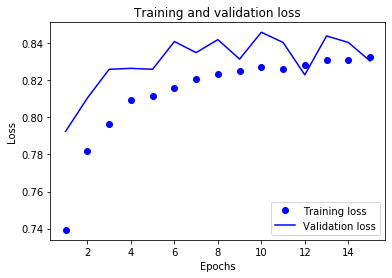

In [94]:
import matplotlib.pyplot as plt

loss = history_dict['acc']
val_loss = history_dict['val_acc']

epochs = range(1, len(loss) + 1)

blue_dots = 'bo'
solid_blue_line = 'b'

plt.plot(epochs, loss, blue_dots, label = 'Training loss')
plt.plot(epochs, val_loss, solid_blue_line, label = 'Validation loss')
plt.title("Training and validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('overfitting.eps', format = 'eps')
plt.show()

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
model = Sequential()
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2,return_sequences=True, input_shape=(None, 27)))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(data_train1,labels1, validation_data=(val_data, val_labels),epochs=60)

Train...
Train on 15000 samples, validate on 2000 samples
Epoch 1/60
15000/15000 [==============================] - 35s 2ms/sample - loss: 0.5663 - accuracy: 0.7150 - val_loss: 0.5234 - val_accuracy: 0.7467
Epoch 2/60
 4032/15000 [=======>......................] - ETA: 23s - loss: 0.5363 - accuracy: 0.7394

KeyboardInterrupt: 

In [74]:
model.predict(data_train[100:110][0:10][:27])

array([[0.8710839 ],
       [0.7943785 ],
       [0.8976494 ],
       [0.7605109 ],
       [0.812257  ],
       [0.8567276 ],
       [0.87976015],
       [0.8202152 ],
       [0.8799096 ],
       [0.15775535]], dtype=float32)

In [75]:
labels[100:110]

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0])

In [76]:
testModel=[]
testModel.append(data_train[100:110][9][:36])
testModel = np.asarray(testModel)
testModel

array([[[  0.  ,   0.  ,   0.  ,   1.  ,   0.  ,  49.  ,   0.  ,  44.  ,
           0.  ,   0.  ,  12.  ,   4.  ,   6.  ,   0.  ,   0.  ,   0.  ,
           0.  ,   3.  ,   0.  ,  24.  ,  12.  ,   0.  ,   1.  ,   0.  ,
           0.  ,   1.  ,   0.  ],
        [  1.  ,   0.  ,   0.  ,   2.  ,   0.  ,  61.  ,   0.  ,  58.  ,
           0.  ,   0.  ,  12.  ,   6.  ,   9.  ,   0.  ,   0.  ,   0.  ,
           0.  ,   3.  ,   0.  ,  27.  ,  13.  ,   0.  ,   1.  ,   0.  ,
           0.  ,   1.  ,   0.  ],
        [  2.  ,   0.  ,   0.  ,   5.  ,   0.  ,  81.  ,   0.  ,  71.  ,
           0.  ,   0.  ,  12.  ,  12.  ,  12.  ,   0.  ,   0.  ,   0.  ,
           0.  ,   3.  ,   0.  ,  30.  ,  14.  ,   0.  ,   1.  ,   0.  ,
           0.  ,   1.  ,   0.  ],
        [  3.  ,   0.  ,   0.  ,   7.  ,   0.  ,  85.  ,   0.  ,  86.  ,
           0.  ,   0.  ,  13.  ,  19.  ,  12.  ,   0.  ,   0.  ,   0.  ,
           0.  ,   6.  ,   0.  ,  40.  ,  15.  ,   3.44,   1.  ,   0.  ,
           0.  ,   1. 

In [77]:
model.predict(testModel)

array([[0.15710792]], dtype=float32)